In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
import warnings
from sklearn import preprocessing

warnings.filterwarnings('ignore')

In [2]:
ds = pd.read_csv('./course_project_train.csv')
y = ds['Credit Default']
X = ds.drop(['Credit Default'], axis=1)
X_orig = X.copy()

In [3]:
X.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0


In [4]:
X.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000


In [5]:
X.shape

(7500, 16)

In [6]:
object_columns = X.select_dtypes(include=['object']).columns
float_columns = X.select_dtypes(include=['float64']).columns

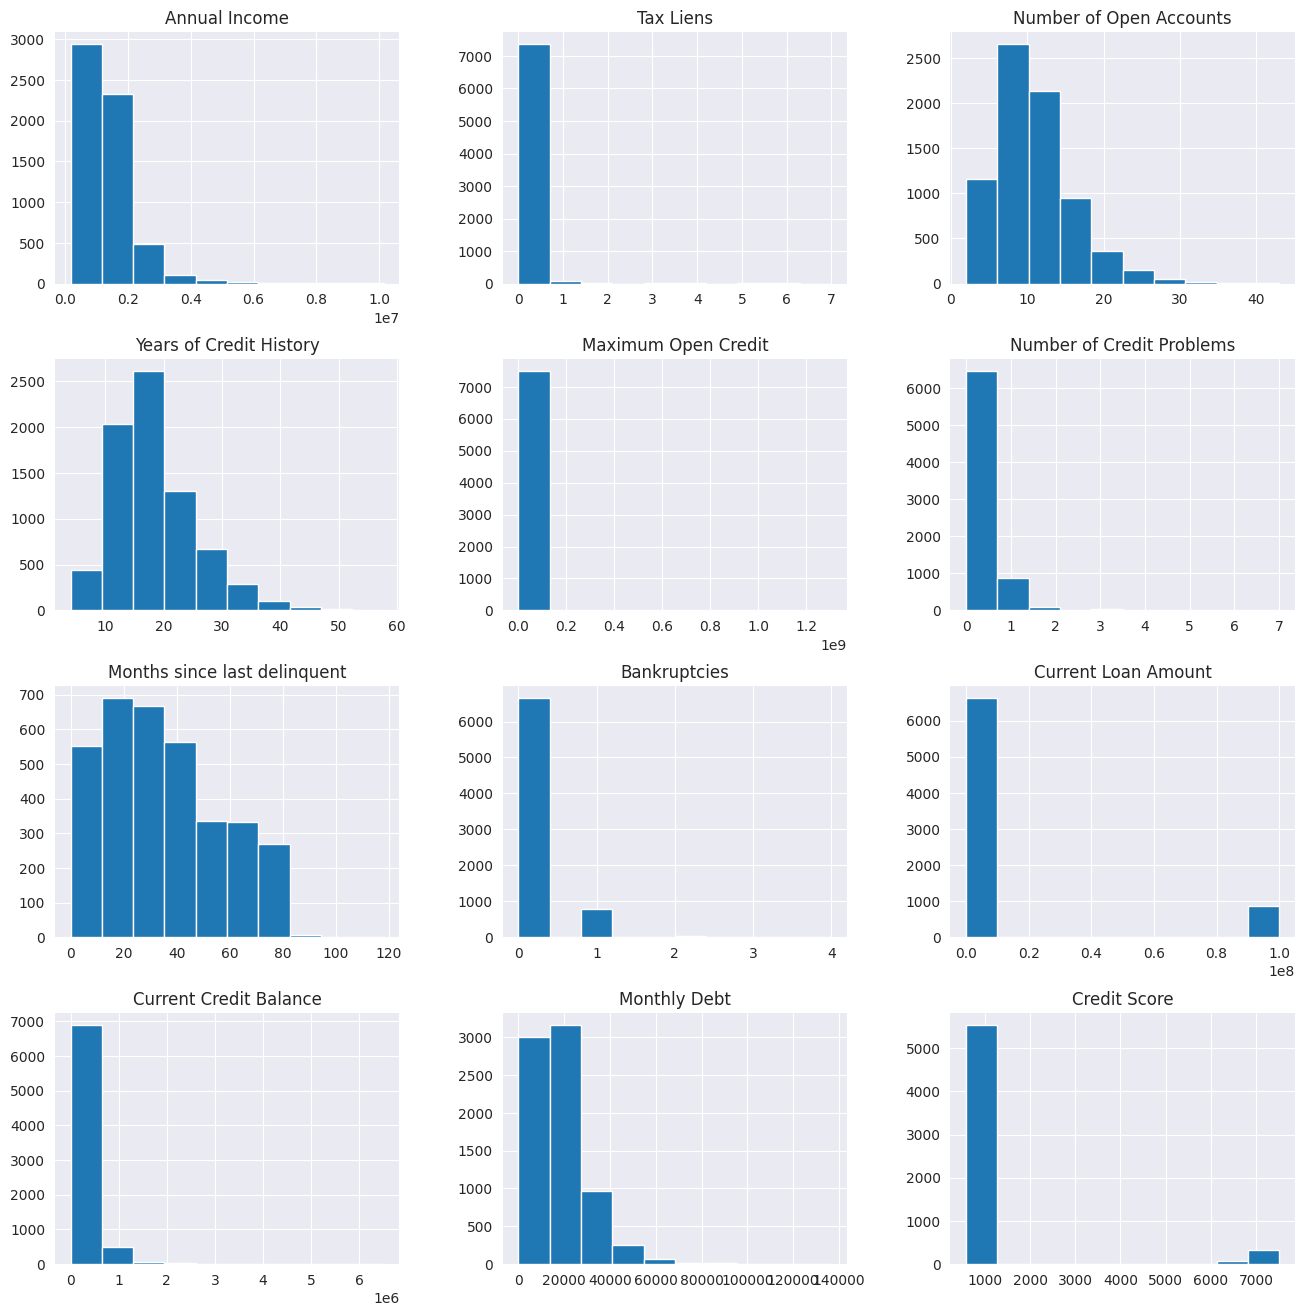

In [7]:
h = X[float_columns].hist(figsize=(16,16))
sns.despine(left=True, bottom=True)

Проверим пропуски

In [8]:
X.isna().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
dtype: int64

Заполним пропуски полей Annual Income, Months since last delinquent, Credit Score, Years in current job медианными значениями
Bankruptcies - нулями


##### Bankruptcies

In [9]:
X['Bankruptcies'] = X['Bankruptcies'].fillna(0.00)
X['Bankruptcies'] = X['Bankruptcies'].astype(np.int)
X['Bankruptcies'].unique()

array([1, 0, 3, 2, 4])

##### Annual Income, Months since last delinquent, Credit Score

In [10]:
def fix_year(row):
    year = row['Years in current job']
    if not year or pd.isnull(year):
        year = '0'
    else:
        year = str(year).replace(' years','').replace('+','').replace(' year','')
        if year == '< 1':
            year = '0'
    row['Years in current job'] = year
    return row
X = X.apply(fix_year, axis=1)
X['Years in current job'] = X['Years in current job'].astype(int)

In [11]:
for col in ['Annual Income', 'Months since last delinquent', 'Credit Score','Years in current job']:
    median = X[col].median()
    X[col] = X[col].fillna(median)

### Вылеты

In [12]:
for float_column in float_columns:
    q1 = np.percentile(X[float_column], 25, interpolation='midpoint')
    q3 = np.percentile(X[float_column], 75, interpolation='midpoint')
    iqr = q3 - q1
    upper = q3 + 1.5 * q1
    X.loc[X[float_column] > upper, float_column] = upper

In [13]:
# Нормализация
scaler = preprocessing.StandardScaler()

X[float_columns] = scaler.fit_transform(X[float_columns])

In [14]:
X.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Own Home,-1.413447,0,0.0,-0.018313,1.155682,0.363231,0.0,-0.082817,0.0,debt consolidation,Short Term,1.845862,-1.222161,-0.981883,-0.130813
1,Own Home,-0.455014,10,0.0,0.825615,-0.431231,1.787092,0.0,-0.082817,0.0,debt consolidation,Long Term,-0.433364,0.919203,0.071706,-0.179395
2,Home Mortgage,-0.938419,8,0.0,-0.018313,2.410786,1.789114,0.0,-0.082817,0.0,debt consolidation,Short Term,1.845862,0.385793,-0.403965,-0.159153
3,Own Home,-0.843782,6,0.0,-0.651259,0.607476,-1.183523,0.0,-0.082817,0.0,debt consolidation,Short Term,-1.056277,-0.923559,-0.636966,-0.353478
4,Rent,-0.894586,8,0.0,0.403651,-0.676481,-0.498731,0.0,-0.082817,0.0,debt consolidation,Short Term,-1.036996,-0.939244,-1.055823,-0.252267


### Категориальные признаки

In [15]:
home_ownership_map = {'Own Home': 3,
'Home Mortgage': 2,
'Rent': 1,
'Have Mortgage': 2
}
X['Home Ownership'] = X['Home Ownership'].map(home_ownership_map)

In [16]:
X['Purpose'].unique()

array(['debt consolidation', 'other', 'home improvements', 'take a trip',
       'buy a car', 'small business', 'business loan', 'wedding',
       'educational expenses', 'buy house', 'medical bills', 'moving',
       'major purchase', 'vacation', 'renewable energy'], dtype=object)

In [17]:
le = preprocessing.LabelEncoder()
le.fit(X['Purpose'])
le.classes_

array(['business loan', 'buy a car', 'buy house', 'debt consolidation',
       'educational expenses', 'home improvements', 'major purchase',
       'medical bills', 'moving', 'other', 'renewable energy',
       'small business', 'take a trip', 'vacation', 'wedding'],
      dtype=object)

In [18]:
X['Purpose'] = le.transform(X['Purpose'])

In [19]:
# Term
term_map = { 'Short Term': 0, 'Long Term': 1 }
X['Term'] = X['Term'].map(term_map)

In [59]:
# X['Purpose'] = X['Purpose'].astype('category')
# X['Home Ownership'] = X['Home Ownership'].astype('category')
# X['Term'] = X['Term'].astype('category')
X['Purpose'] = X['Purpose'].astype('int')
X['Home Ownership'] = X['Home Ownership'].astype('int')
X['Term'] = X['Term'].astype('int')

In [60]:
X['Term'].unique()

array([0, 1])

In [53]:
# Добавление новых признаков
X['ci_ratio'] = X['Annual Income']/X['Monthly Debt']
X['max_cr_ratio'] = X['Annual Income']/X['Maximum Open Credit']

<AxesSubplot:>

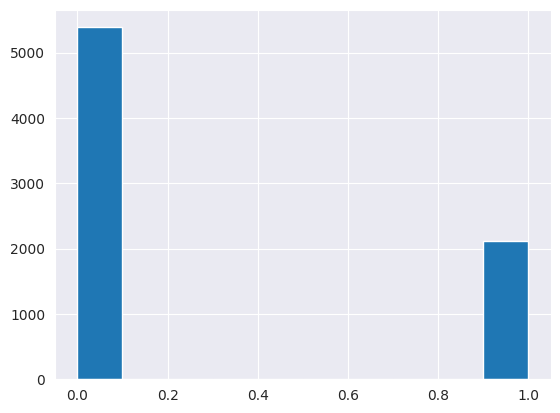

In [58]:
y.hist()

In [64]:
y.value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

In [65]:
X['TARGET'] = y
rat = len(X.loc[X['TARGET']==0])//len(X.loc[X['TARGET']==1])
rat

2

In [67]:
df_1 = X.loc[X['TARGET']==1]
df_1 = df_1.loc[df_1.index.repeat(rat)]
X_n = pd.concat([X.loc[X['TARGET']==0], df_1]).sample(frac=1)

In [68]:
X_n['TARGET'].value_counts()

0    5387
1    4226
Name: TARGET, dtype: int64

In [69]:
X =  X_n[X_n.columns.difference(['TARGET'])]
y = X_n['TARGET']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=56)

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.67      0.83      0.74      1091
           1       0.68      0.46      0.55       832

    accuracy                           0.67      1923
   macro avg       0.68      0.65      0.65      1923
weighted avg       0.67      0.67      0.66      1923



In [72]:
import catboost as catb
model_catb = catb.CatBoostClassifier(silent=True,
                                     cat_features=['Home Ownership','Purpose','Term'],
                                     n_estimators=500, max_depth=6,
                                     random_state=41
                                     )
model_catb.fit(X_train, y_train)

y_train_pred = model_catb.predict(X_train)
y_test_pred = model_catb.predict(X_test)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1091
           1       0.75      0.64      0.70       832

    accuracy                           0.76      1923
   macro avg       0.76      0.74      0.75      1923
weighted avg       0.76      0.76      0.75      1923



In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_train_pred  = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)
print(classification_report(y_test, y_test_pred))

print(roc_auc_score(y_test, y_test_pred, average='weighted'))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1091
           1       0.87      0.87      0.87       832

    accuracy                           0.89      1923
   macro avg       0.88      0.88      0.88      1923
weighted avg       0.89      0.89      0.89      1923

0.8843983554255095


In [78]:
model_catb = catb.CatBoostClassifier(silent=True,
                                     cat_features=['Home Ownership','Purpose','Term'],
                                     n_estimators=500, max_depth=6,
                                     random_state=41
                                     )
model_catb.fit(X_train, y_train)

y_train_pred = model_catb.predict(X_train)
y_test_pred = model_catb.predict(X_test)

print(classification_report(y_test, y_test_pred))
print(roc_auc_score(y_test, y_test_pred, average='weighted'))


              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1091
           1       0.75      0.64      0.70       832

    accuracy                           0.76      1923
   macro avg       0.76      0.74      0.75      1923
weighted avg       0.76      0.76      0.75      1923

0.7423720298949446
